Importing Libreries

In [16]:
"""
Description:
    Analyzing and predicting Adults Income
    "Adult_TesrDataset.csv & Adult_TrainDataset.csv" are the datasets
    Project for Amirkabir University of Technilogy (Tehran Polytechnic)
    Computer Scince department
    Data Mining Course

Student Name & ID: Pouria Alimoradpor 9912035
"""
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Load Data

In [17]:
df = pd.read_csv("Data/Adult_TrainDataset.csv")

In [18]:
df.head()

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Work_Class        32561 non-null  object
 2   Final_Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education-Number  32561 non-null  int64 
 5   Marital_Status    32561 non-null  object
 6   Occupation        32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Sex               32561 non-null  object
 10  Capital_Gain      32561 non-null  int64 
 11  Capital_Loss      32561 non-null  int64 
 12  Hours-Per-Week    32561 non-null  int64 
 13  Native_Country    32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [20]:
df.describe()

,Age,Final_Weight,Education-Number,Capital_Gain,Capital_Loss,Hours-Per-Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Pre-Processing

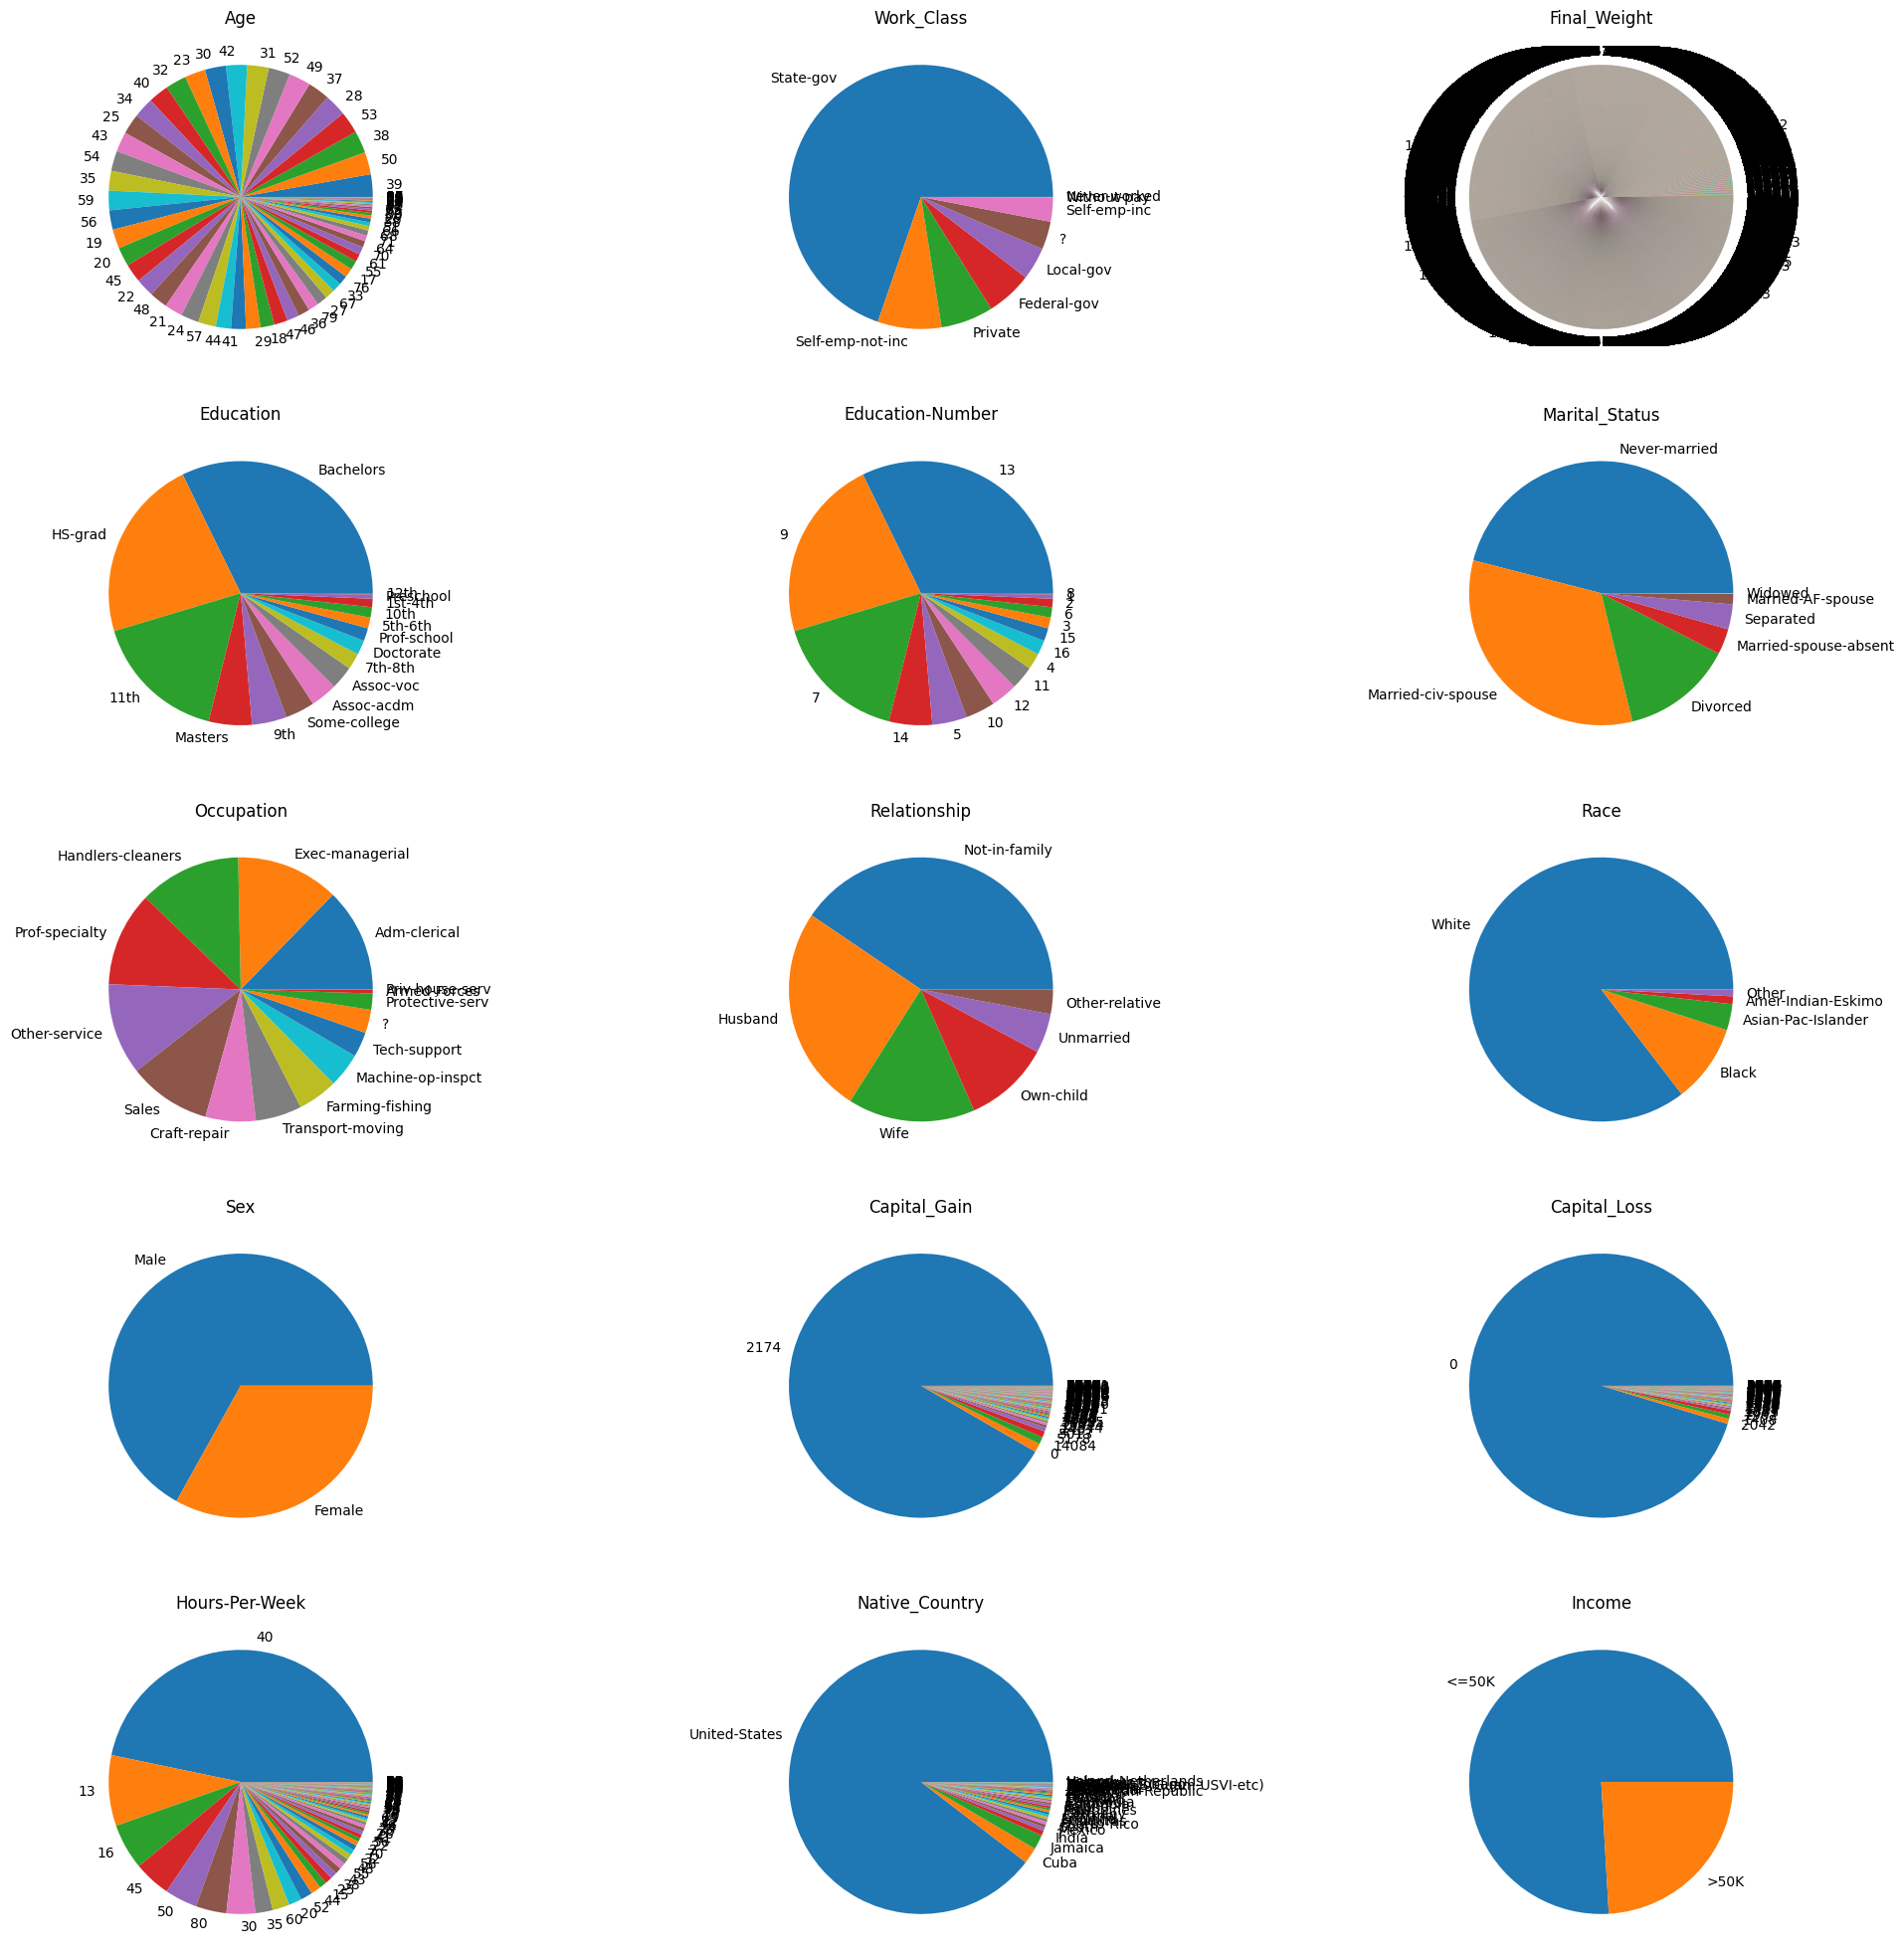

In [21]:
# Display all columns unique values in Pie Chart (by one plot in subplots)
fig, axes = plt.subplots(5, 3, figsize=(25, 25))
for i, ax in enumerate(axes.flatten()):
    if i < len(df.columns):
        ax.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].unique())
        ax.set_title(df.columns[i])
    else:
        ax.axis('off')
plt.show()

In [22]:
# Replace all "?" with "NaN"
df.replace("?", np.nan, inplace=True)

In [23]:
# Number of NaN values in each column
df.isnull().sum()

Age                    0
Work_Class          1836
Final_Weight           0
Education              0
Education-Number       0
Marital_Status         0
Occupation          1843
Relationship           0
Race                   0
Sex                    0
Capital_Gain           0
Capital_Loss           0
Hours-Per-Week         0
Native_Country       583
Income                 0
dtype: int64

In [24]:
# Replace all NaN values with the most frequent value in each column
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Number of NaN values in each column
df.isnull().sum()

Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64

Data Visualization

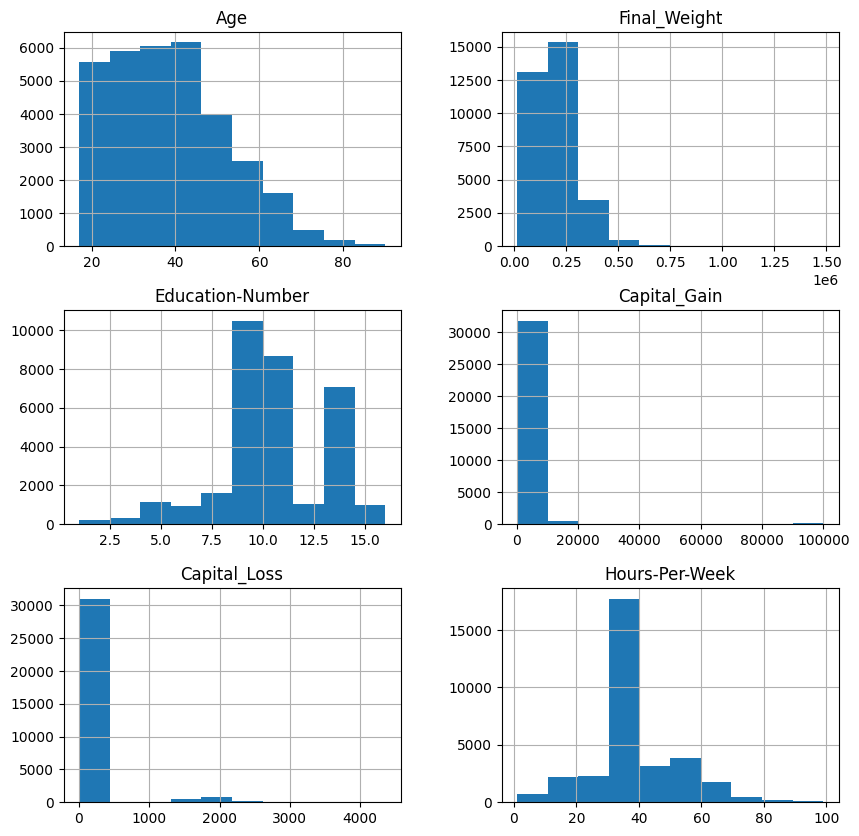

In [25]:
# Plot a histogram of the features
df.hist(figsize=(10,10))
plt.show()

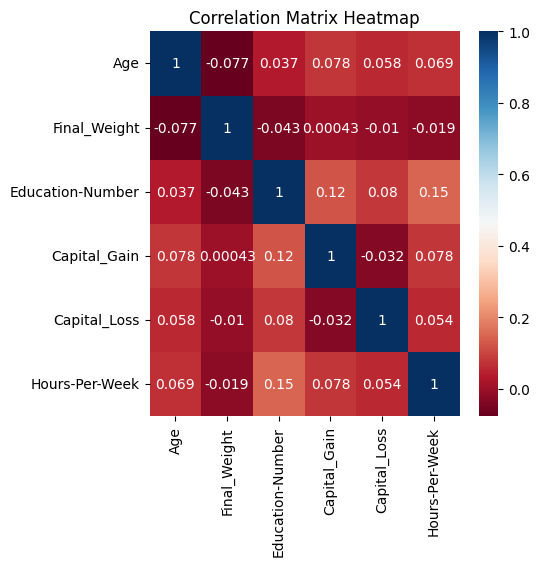

In [26]:
# Plot a correlation matrix of the features
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(numeric_only=True), cbar=True, annot=True, cmap='RdBu')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [27]:
# Encode all categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

# Display all columns unique values in array
for col in df.columns:
    print(df[col].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[6 5 3 0 1 4 7 2]
[ 77516  83311 215646 ...  34066  84661 257302]
[ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
[4 2 0 3 5 1 6]
[ 0  3  5  9  7 11  2 13  4  6 12 10  1  8]
[1 0 5 3 4 2]
[4 2 1 0 3]
[1 0]
[ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
  3432 

Encoding and Scaling

In [28]:
# Encode all categorical columns
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = ohe.fit_transform(df[col].values.reshape(-1, 1)).toarray()

# Normalize all columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
for col in df.columns:
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

Classification

In [31]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop("Income", axis=1)
y = df["Income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))


Accuracy Score:  0.8317211730385383
Confusion Matrix: 
 [[4598  340]
 [ 756  819]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      4938
         1.0       0.71      0.52      0.60      1575

    accuracy                           0.83      6513
   macro avg       0.78      0.73      0.75      6513
weighted avg       0.82      0.83      0.82      6513

